In [33]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score



In [3]:
df = pd.read_csv('StressLevelDataset.csv')

In [4]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [7]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

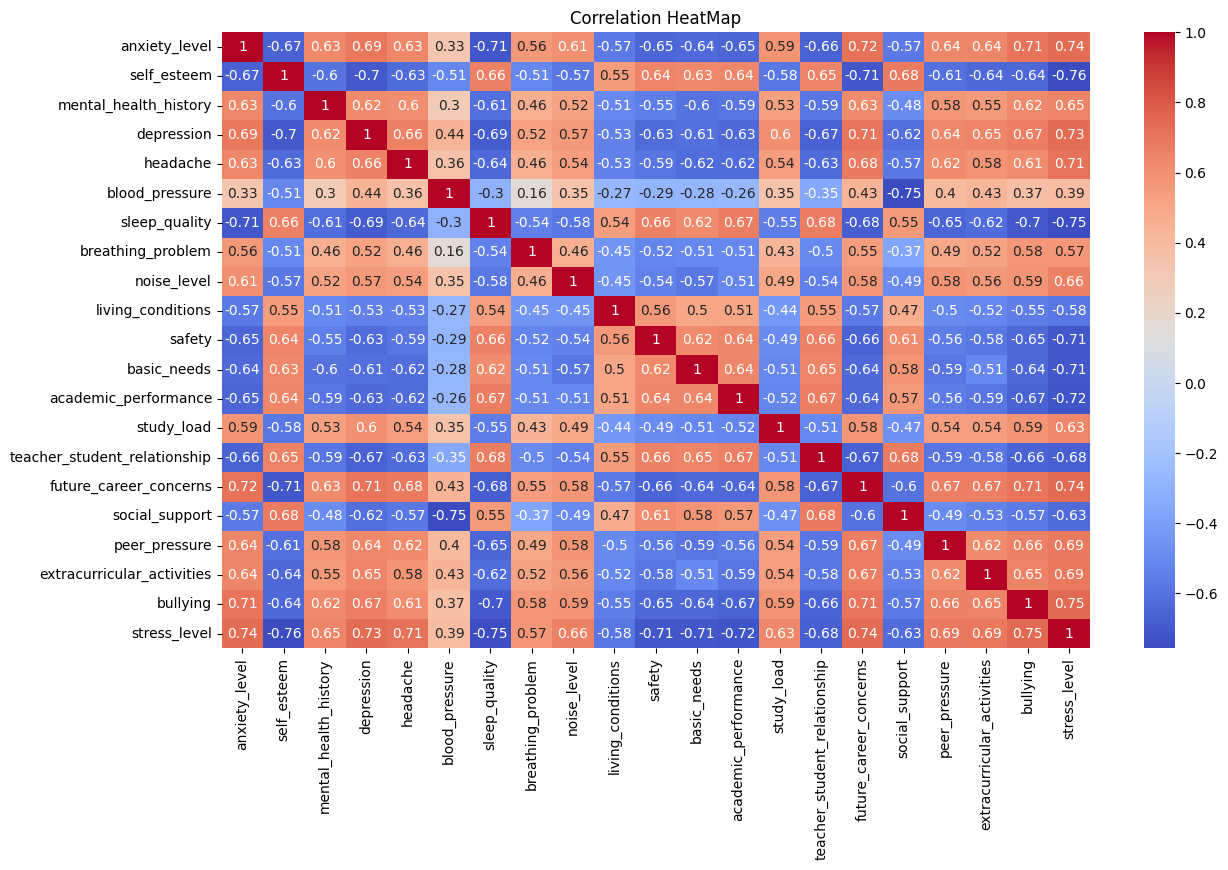

In [9]:
# Heatmap to visualize correlations

plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot= True, cmap = "coolwarm")
plt.title("Correlation HeatMap")
plt.show()

In [10]:
x = df.drop(columns = ['self_esteem','sleep_quality','academic_performance','basic_needs','safety','living_conditions', 'teacher_student_relationship','social_support'])
y = df[['stress_level']]


In [12]:
x.sample(5)

,anxiety_level,mental_health_history,depression,headache,blood_pressure,breathing_problem,noise_level,study_load,future_career_concerns,peer_pressure,extracurricular_activities,bullying,stress_level
574,18,1,18,5,3,4,0,1,5,1,1,5,0
445,21,1,18,3,3,3,4,3,4,5,5,5,2
486,2,0,6,1,2,1,2,2,1,1,2,1,0
691,12,0,4,2,3,1,4,1,4,5,1,3,2
101,20,0,22,0,3,4,1,2,2,1,3,0,1


In [13]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   anxiety_level               1100 non-null   int64
 1   mental_health_history       1100 non-null   int64
 2   depression                  1100 non-null   int64
 3   headache                    1100 non-null   int64
 4   blood_pressure              1100 non-null   int64
 5   breathing_problem           1100 non-null   int64
 6   noise_level                 1100 non-null   int64
 7   study_load                  1100 non-null   int64
 8   future_career_concerns      1100 non-null   int64
 9   peer_pressure               1100 non-null   int64
 10  extracurricular_activities  1100 non-null   int64
 11  bullying                    1100 non-null   int64
 12  stress_level                1100 non-null   int64
dtypes: int64(13)
memory usage: 111.8 KB


In [14]:
# Split data into train and test set

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
# Feature Scaling

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [16]:
# Convert to DataFrame for better readability

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns, index = x_train.index)
x_test_scaled = pd.DataFrame(x_test_scaled, columns= x_test.columns, index= x_test.index)

In [17]:
print("scaled Train Data:\n")
display(x_train_scaled.head(3))

scaled Train Data:



,anxiety_level,mental_health_history,depression,headache,blood_pressure,breathing_problem,noise_level,study_load,future_career_concerns,peer_pressure,extracurricular_activities,bullying,stress_level
507,-0.346572,-0.993205,-0.337648,-0.375811,-1.423892,0.865673,0.252053,0.298254,-0.434142,-0.536202,0.153064,-0.411846,-0.001382
551,0.144281,-0.993205,0.055208,0.333875,-1.423892,-0.548983,0.252053,-0.458124,0.216701,0.165967,-0.555863,0.245912,-0.001382
290,-0.346572,1.006842,-1.385265,0.333875,0.974242,0.865673,1.011663,1.054632,-0.434142,-1.238372,1.570916,0.245912,-1.217521


In [18]:
print("scaled Train Data:\n")
display(x_test_scaled.head(3))

scaled Train Data:



,anxiety_level,mental_health_history,depression,headache,blood_pressure,breathing_problem,noise_level,study_load,future_career_concerns,peer_pressure,extracurricular_activities,bullying,stress_level
328,1.658759,1.046536,1.679055,0.411154,1.013566,1.743385,0.312287,1.800273,1.620585,1.676733,1.597208,1.541310,1.251643
688,-1.281566,-0.955533,-1.421953,-1.013316,-0.191756,-0.495203,-0.418598,-1.312183,-1.055052,-0.435183,-1.180545,-1.008226,-1.196014
413,0.025245,1.046536,-0.429631,-0.301081,-1.397077,0.997189,0.312287,0.244045,-0.386143,0.268789,-0.486107,-0.370842,0.027814


In [31]:
# Model Training

models = {
    "LogisticRegression" : LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    
}

results = {}
best_model = None
best_score = 0

for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc*100:.2f}%")
    
    # Track best
    if acc > best_score:
        best_score = acc
        best_model = model
   
    print(f"confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print(f"classification_report:\n {classification_report(y_test, y_pred)}")
    results[name] = (model, y_pred) 
    
print("\nBest model:", best_model, "with accuracy:", best_score)

LogisticRegression Accuracy: 100.00%
confusion Matrix: 
[[76  0  0]
 [ 0 73  0]
 [ 0  0 71]]
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        71

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220

RandomForestClassifier Accuracy: 100.00%
confusion Matrix: 
[[76  0  0]
 [ 0 73  0]
 [ 0  0 71]]
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        71

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



/home/aminul/anaconda3/envs/spector/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aminul/anaconda3/envs/spector/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aminul/anaconda3/envs/spector/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


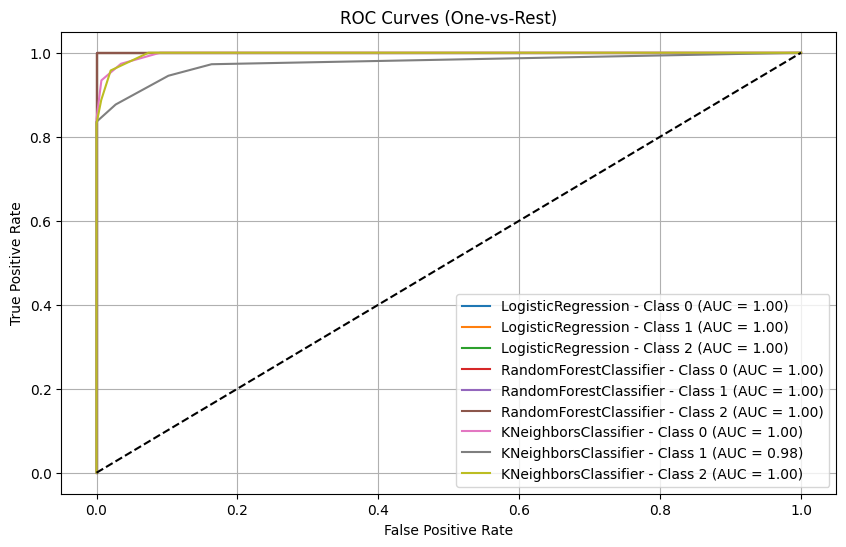

In [29]:
# Plot ROC Curves

plt.figure(figsize = (10,6))
for name, (model, _) in results.items():
    y_prob = model.predict_proba(x_test_scaled)
    # For each class
    n_classes = y_prob.shape[1]
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
        auc_score = roc_auc_score((y_test == i).astype(int), y_prob[:, i])
        plt.plot(fpr, tpr, label=f"{name} - Class {i} (AUC = {auc_score:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curves (One-vs-Rest)")
plt.legend()
plt.grid()
plt.show()

In [34]:
# Save the best model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)